In [1]:
#Import Dependencies
import pandas as pd
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from scipy.stats import linregress

#Create Output File (CSV)
output_data_file = "output_data/cities.csv"

In [2]:
#Use CityPy to generate list of cities for weather data

from citipy import citipy


#Set latitude and longitude ranges 

latitide_range = (-90, 90)
longitude_range = (-180, 180)


#Set empty lists to hold city and coordinates
coordinates = []
cities = []

#Set random latitude and longitude coordinates
lats = np.random.uniform(latitide_range[0], latitide_range[1], size=1500)
lngs = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coordinates = zip(lats, lngs)


#Use loop to select closest city to random coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #Add city to city list if unique
    if city not in cities:
        cities.append(city)
        
len(cities)

625

In [3]:
#Set URL config

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Create partial URL with API key

query_url = f'{url}appid={api_key}&units={units}&q='


In [4]:
#Create empty lists for necessary data
city_name = []
latitude = []
longitude= []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []

record = 1

print('Beginning Data Retrieval')
print('------------------------')

#Create for loop to append above lists with weather data
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f'Processing Record {record} | {city}')
        
        record = record + 1
        
        time.sleep(1.00)
    
    except Exception:
        print("City not found. Skipping...")
    continue
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 | bredasdorp
Processing Record 2 | lavrentiya
Processing Record 3 | hualmay
Processing Record 4 | east london
Processing Record 5 | rikitea
Processing Record 6 | geraldton
Processing Record 7 | ribeira grande
Processing Record 8 | talnakh
Processing Record 9 | jamestown
Processing Record 10 | chuy
Processing Record 11 | stornoway
Processing Record 12 | avarua
City not found. Skipping...
Processing Record 13 | clyde river
Processing Record 14 | new norfolk
Processing Record 15 | castro
Processing Record 16 | norman wells
Processing Record 17 | gushikawa
Processing Record 18 | dongsheng
Processing Record 19 | mahebourg
Processing Record 20 | mataura
Processing Record 21 | albany
Processing Record 22 | thompson
Processing Record 23 | beziers
Processing Record 24 | souillac
Processing Record 25 | chongqing
Processing Record 26 | chunoyar
Processing Record 27 | puerto ayora
Processing Record 28 | lebu
Processing Record 29

Processing Record 235 | port blair
Processing Record 236 | awjilah
Processing Record 237 | hermanus
Processing Record 238 | barra do bugres
Processing Record 239 | port-cartier
Processing Record 240 | ujjain
Processing Record 241 | khatanga
Processing Record 242 | olga
Processing Record 243 | carnarvon
Processing Record 244 | kedrovyy
Processing Record 245 | college
Processing Record 246 | le port
Processing Record 247 | rincon
Processing Record 248 | isangel
Processing Record 249 | saldanha
Processing Record 250 | ukiah
Processing Record 251 | aklavik
Processing Record 252 | shu
Processing Record 253 | flin flon
City not found. Skipping...
Processing Record 254 | tocopilla
Processing Record 255 | najran
Processing Record 256 | kokopo
Processing Record 257 | canico
Processing Record 258 | killybegs
Processing Record 259 | lagoa
Processing Record 260 | darnah
Processing Record 261 | tuktoyaktuk
Processing Record 262 | mandalgovi
Processing Record 263 | leningradskiy
City not found. Skip

Processing Record 460 | saint anthony
Processing Record 461 | ponta delgada
Processing Record 462 | chute-aux-outardes
Processing Record 463 | san gabriel casa blanca
Processing Record 464 | cairns
City not found. Skipping...
Processing Record 465 | yaan
Processing Record 466 | russell
Processing Record 467 | marzuq
Processing Record 468 | la ronge
Processing Record 469 | dumbraveni
Processing Record 470 | sorland
Processing Record 471 | arlit
Processing Record 472 | pedernales
Processing Record 473 | khovu-aksy
Processing Record 474 | fort saint james
Processing Record 475 | benghazi
Processing Record 476 | taltal
Processing Record 477 | manokwari
Processing Record 478 | itarema
Processing Record 479 | chernyshevskiy
Processing Record 480 | sao filipe
Processing Record 481 | naze
Processing Record 482 | batagay-alyta
Processing Record 483 | axim
Processing Record 484 | simbahan
Processing Record 485 | tawang
Processing Record 486 | daru
Processing Record 487 | perth
Processing Record 

In [7]:
#Create dictionary for weather DF

weather_dict={
    'City': city_name,
    'Country': country,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature (F)': temperature,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(output_data_file, index=False, header=True)
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bredasdorp,ZA,-34.53,20.04,64.40,77,100,4.70
1,Lavrentiya,RU,65.58,-171.00,30.87,92,100,10.40
2,Hualmay,PE,-11.10,-77.61,64.62,82,95,6.87
3,East London,ZA,-33.02,27.91,69.80,83,33,17.54
4,Rikitea,PF,-23.12,-134.97,75.43,83,100,16.69


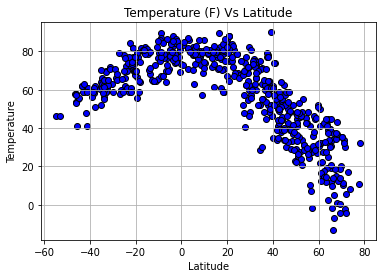

In [8]:
#Create Scatterplot for Temperature (F) Vs Latitude

plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Temperature (F) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(True)
plt.savefig("Output_Data/TempVsLatitude.png")

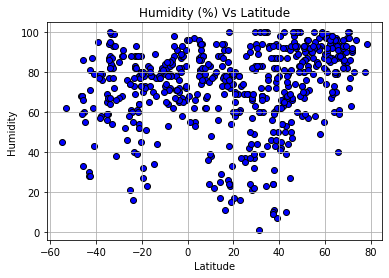

In [9]:
#Create Scatterplot for Humidity (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Humidity (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig("Output_Data/HumidityVsLatitude.png")

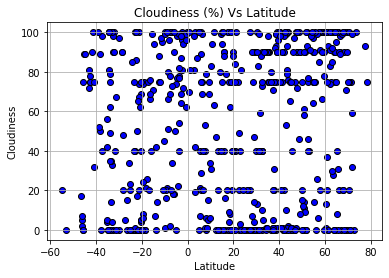

In [10]:
#Create Scatterplot for Cloudiness (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Cloudiness (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig("Output_Data/CloudinessVsLatitude.png")

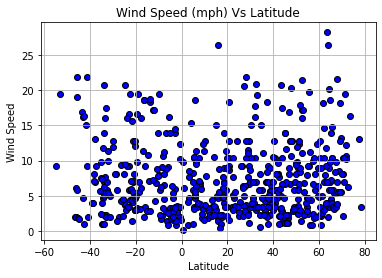

In [11]:
#Create Scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Wind Speed (mph) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig("Output_Data/WindSpeedVsLatitude.png")

In [12]:
#Create separate DF for Northern Hemisphere

northern_df = weather_df.loc[weather_df['Latitude'] > 0]
northern_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
1,Lavrentiya,RU,65.58,-171.00,30.87,92,100,10.40
6,Ribeira Grande,PT,38.52,-28.70,63.28,61,99,5.70
7,Talnakh,RU,69.49,88.40,-4.54,82,0,5.59
8,Jamestown,US,42.10,-79.24,41.00,100,90,8.05
10,Stornoway,GB,58.21,-6.39,44.60,93,100,8.05


In [13]:
#Create separate DF for Southern Hemisphere
southern_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bredasdorp,ZA,-34.53,20.04,64.40,77,100,4.70
2,Hualmay,PE,-11.10,-77.61,64.62,82,95,6.87
3,East London,ZA,-33.02,27.91,69.80,83,33,17.54
4,Rikitea,PF,-23.12,-134.97,75.43,83,100,16.69
5,Geraldton,AU,-28.77,114.60,66.20,68,90,8.05


The r-value is: -0.8683482767215313


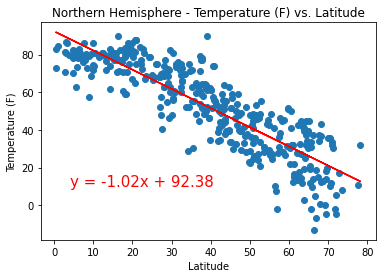

<Figure size 432x288 with 0 Axes>

In [14]:
#Create Linear Regression for Northern Hemisphere - Temperature (F) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthTempVsLat.png")

The r-value is: 0.7822664312166333


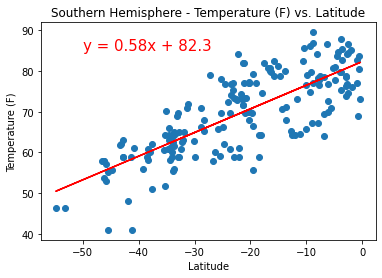

<Figure size 432x288 with 0 Axes>

In [15]:
#Create Linear Regression for Southern Hemisphere - Temperature (F) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthTempVsLat.png")

The r-value is: 0.3215178906664834


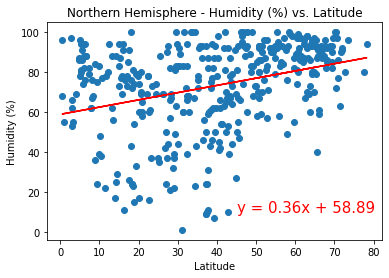

<Figure size 432x288 with 0 Axes>

In [16]:
#Create Linear Regression for Northern Hemisphere - Humidity (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthHumidityVsLat.png")

The r-value is: 0.19926707408285538


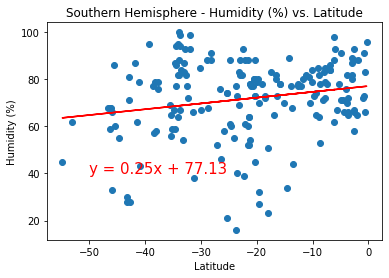

<Figure size 432x288 with 0 Axes>

In [17]:
#Create Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthHumidityVsLat.png")

The r-value is: 0.14587176387969072


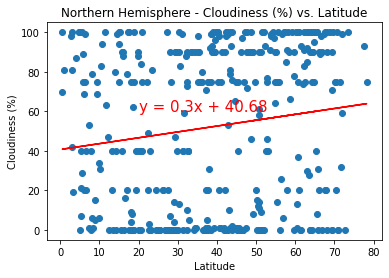

<Figure size 432x288 with 0 Axes>

In [18]:
#Create Linear Regression for Northern Hemisphere - Cloudiness (%) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 60),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthCloudinessVsLat.png")

The r-value is: 0.2192006754268858


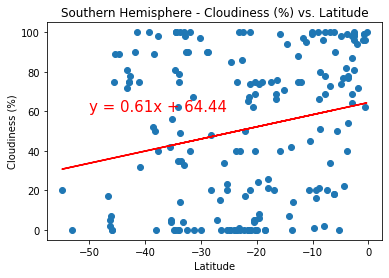

<Figure size 432x288 with 0 Axes>

In [19]:
#Create Linear Regression for Southern Hemisphere - Cloudiness (%) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthCloudinessVsLat.png")

The r-value is: 0.14877501457219452


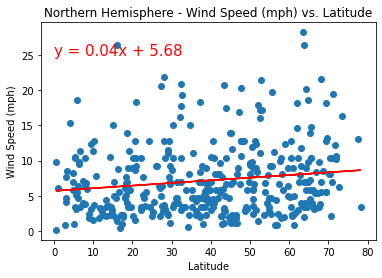

<Figure size 432x288 with 0 Axes>

In [20]:
#Create Linear Regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/NorthWindSpeedVsLat.png")

The r-value is: -0.14012840035577315


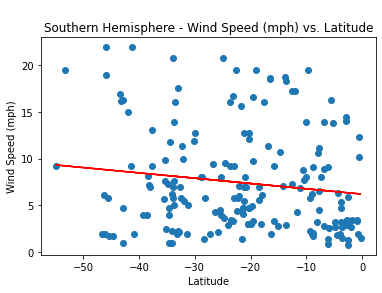

<Figure size 432x288 with 0 Axes>

In [21]:
#Create Linear Regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Output_Data/SouthWindSpeedVsLat.png")